# 1c


['__header__', '__version__', '__globals__', 'a', 'b']


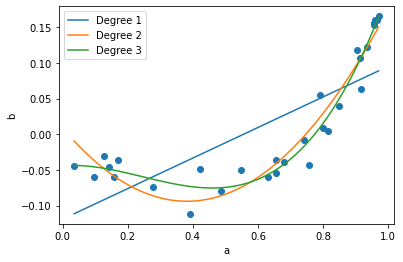

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('polydata.mat')
print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

#import data from polydata.mat
a = in_data['a']
b= in_data['b']
m = len(a)

#Create matrices from the 1st to 3 degree
A1 = np.column_stack((np.ones(30), a))
A2 = np.column_stack((A1, np.square(a)))
A3 = np.column_stack((A2, np.power(a, 3)))


#Solve for w for each degree
w1 = np.linalg.inv(A1.T @ A1) @ A1.T @ b
w2 = np.linalg.inv(A2.T @ A2) @ A2.T @ b
w3 = np.linalg.inv(A3.T @ A3) @ A3.T @ b

#next I will use np.poly1d to create a polynomial for each solution
#To do this I have to reverse the order of each w 
degree1 = np.poly1d(w1.flatten()[::-1])
degree2 = np.poly1d(w2.flatten()[::-1])
degree3 = np.poly1d(w3.flatten()[::-1])

# Plot the data points and polynomial fits
x_plot = np.linspace(np.min(a), np.max(a), 100)


plt.scatter(a, b)
plt.plot(x_plot, degree1(x_plot), label='Degree 1')
plt.plot(x_plot, degree2(x_plot), label='Degree 2')
plt.plot(x_plot, degree3(x_plot), label='Degree 3')
plt.xlabel("a")
plt.ylabel("b")
plt.legend()
plt.show()



